##
### Librarie & Functions
##

In [2]:
from functions_and_librairies_p9 import *

In [3]:
plt.rcParams["axes.facecolor"] = "None"
plt.rcParams["axes.facecolor"] = "None"
plt.rcParams["axes.labelcolor"] = "fc7800"
plt.rcParams["xtick.color"] = "fc5b6b"
plt.rcParams["ytick.color"] = "fc7800"
plt.rcParams["axes.titlecolor"] = "#fc5b6b"
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["grid.color"] = "#5bd3d3"

##
##
### Lecture data
##
##



In [4]:
df = pd.read_csv('Df_ACP.csv')
df = df.set_index('Zone').drop(columns=['Année'])
infosurdf(df)

Disponibilité alimentaire (Kcal/personne/jour)  \
type de la colonne                                               float64   
nombre de valeurs NaN                                                  0   
valeurs nulles en %                                                  0.0   
nombre de valeurs uniques                                            158   
nombre de valeurs totales                                            164   

                          Disponibilité de protéines en quantité (g/personne/jour)  \
type de la colonne                                                   float64         
nombre de valeurs NaN                                                      0         
valeurs nulles en %                                                      0.0         
nombre de valeurs uniques                                                161         
nombre de valeurs totales                                                164         

                          Demographic Evolution PIB/Habitant ($)  \
type de la colonne                      float64          float64   
nombre de valeurs NaN                         0                0   
valeurs nulles en %                         0.0              0.0   
nombre de valeurs uniques                   155              164   
nombre de valeurs totales                   164              164   

                          V-Autosuffisance V-Importations - Quantité  
type de la colonne                 float64                   float64  
nombre de valeurs NaN                    0                         0  
valeurs nulles en %                    0.0                       0.0  
nombre de valeurs uniques              112                        81  
nombre de valeurs totales              164                       164

In [5]:
df.head(3)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                             1997.0   
Afrique du Sud                                          2987.0   
Albanie                                                 3400.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 54.09          
Afrique du Sud                                              83.36          
Albanie                                                    119.50          

                Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Zone                                                                        
Afghanistan                     12.48            2058.4              0.00   
Afrique du Sud                   6.19           13860.3             78.71   
Albanie                         -0.68           12771.0             25.49   

                V-Importations - Quantité  
Zone                                       
Afghanistan                          29.0  
Afrique du Sud                      514.0  
Albanie                              38.0

##
##
### Matrice & Normalisation data
##
##

In [6]:
X = df.values
names = df.index
X.shape

(164, 6)

In [7]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

##
# ACP
##

In [8]:
# df.fillna(0)

In [9]:
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [10]:
df.head(3)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                             1997.0   
Afrique du Sud                                          2987.0   
Albanie                                                 3400.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 54.09          
Afrique du Sud                                              83.36          
Albanie                                                    119.50          

                Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Zone                                                                        
Afghanistan                     12.48            2058.4              0.00   
Afrique du Sud                   6.19           13860.3             78.71   
Albanie                         -0.68           12771.0             25.49   

                V-Importations - Quantité  
Zone                                       
Afghanistan                          29.0  
Afrique du Sud                      514.0  
Albanie                              38.0

                                     1          2          3          4  \
Cumul de variance expliquée  52.631023  68.532837  81.846593  92.021782   

                                     5      6  
Cumul de variance expliquée  98.128225  100.0  


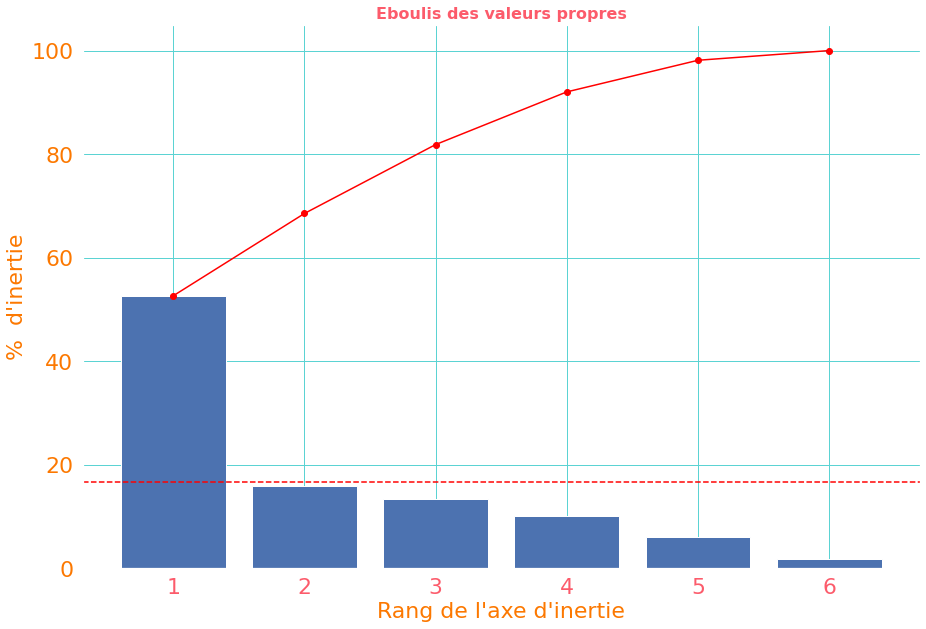

In [11]:
display_scree_plot(pca)

Les 4 premieres variables expliquent 92 % de la variance totale des données

In [12]:
pca4 = decomposition.PCA(n_components=4)
X_trans = pca4.fit_transform(X_scaled)
df_pca4 = pd.DataFrame(X_trans, index=names, columns=['1e CP', '2e CP', '3e CP', '4e CP'])
df_pca4

1e CP     2e CP     3e CP     4e CP
Zone                                                         
Afghanistan           -2.986881  0.663950 -0.072248  0.066974
Afrique du Sud         0.648761  1.581558  1.364593 -0.619251
Albanie                1.593848 -0.624096 -1.240483 -0.979460
Algérie                0.533069 -0.484952  0.017683  0.940680
Allemagne              3.447766  2.910362  1.343827 -1.025187
...                         ...       ...       ...       ...
Émirats arabes unis    2.564943  2.108725 -0.950227 -0.509565
Équateur              -0.899417 -0.587418  0.703230  0.372146
États-Unis d'Amérique  3.237005 -0.060614 -0.479798  0.851941
Éthiopie              -2.314963  0.441802 -0.420651  0.106597
Îles Salomon          -2.460733  0.426321 -0.278501  0.060605

[164 rows x 4 columns]

##
## Cercle des corrélations
##

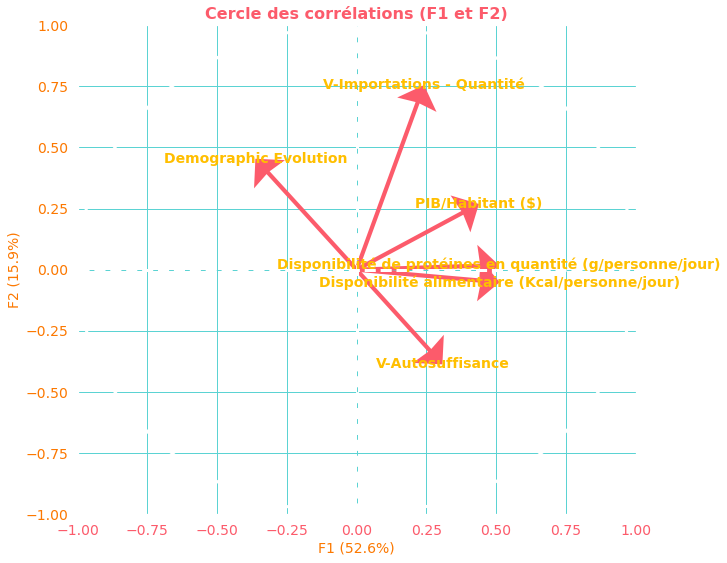

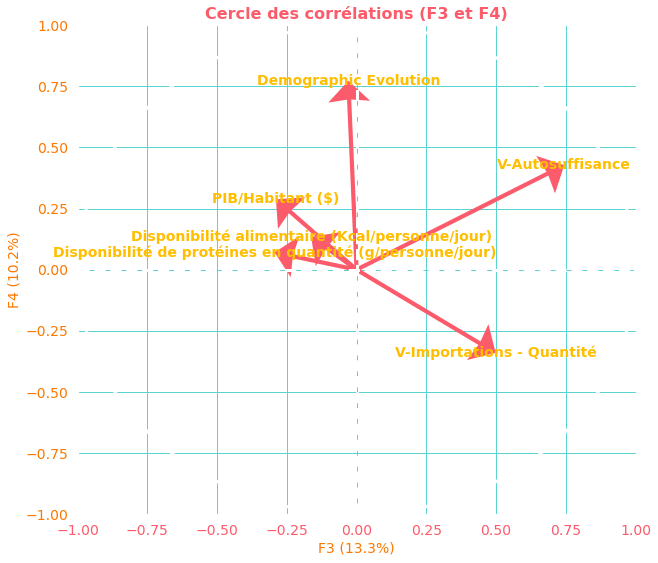

In [13]:
pcs = pca4.components_
n_comp = 4

display_circles(pcs, n_comp, pca4, [(0, 1), (2, 3), (4, 5)], labels = np.array(df.columns))

##
# TODO
# ANALYSE DES CERCLES A FAIRE
##

Le fait que “dispo proteines  ” soit proche de l’axe 1 indique qu’il est très bien représenté par cet axe. Comme il est très éloigné de l’axe 2, on peut conclure qu’il est peu représenté par cet axe.

En ce qui concerne l’axe 2, le point “importations quantité” est très bien corrélé avec l’axe.

Variables les plus correles a F1 sont dispo alimentaire et dispo de proteines. Elles sont corrélées positivement à F1. La variable demographic evolution evolue négativement


Les variables demographic evolution et autosuffisance  sont anticorrelées, plus l'evolution demographique augmente moins l'autosuffisance evolue positivement

F1 = 

F2 = Richesse du pays



##
# Classification Ascendante hiérarchique
##

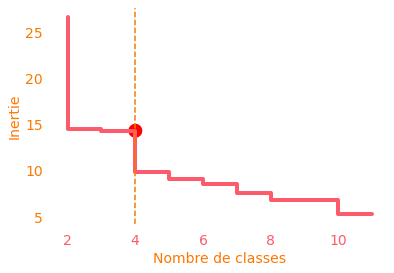

In [14]:
data = df.copy() 
X = data.values 
names = data.index 
X_scaled = preprocessing.StandardScaler().fit_transform(X) 
Z = linkage(X_scaled,method='ward', metric='euclidean') 
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)
plt.step(idxs, last_rev, c="#fc5b6b",linewidth=4)
plt.xlabel("Nombre de classes",fontsize=14)
plt.ylabel("Inertie",fontsize=14)
plt.grid(color='white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
nombre = 4 #Ici, on teste le scénario où il y aurait 4 catégories
plt.scatter(idxs[np.where(idxs==nombre)], last_rev[np.where(idxs==nombre)], c="red", ls='--',linewidths=8)
plt.axvline(idxs[np.where(idxs==nombre)], c="#fc7800", ls='--')
plt.savefig("Inertie",facecolor='none',bbox_inches='tight')
plt.show()

In [15]:
def plot_dendrogram(Z, names, orient):
    count=1020
    plt.figure(figsize=(10, 25))  
    plt.title('Classification Ascendante Hiérarchique \n', fontsize=16, fontweight='bold')
#     plt.xlabel('Distance')
    plt.grid(False)
    plt.axvline(linestyle='--', x=10,color ="red") 
    dendrogram(Z, labels = names, orientation = orient, leaf_font_size=10, color_threshold=10)
    plt.savefig(str(count) + ".png", transparent=True)
    count += 1

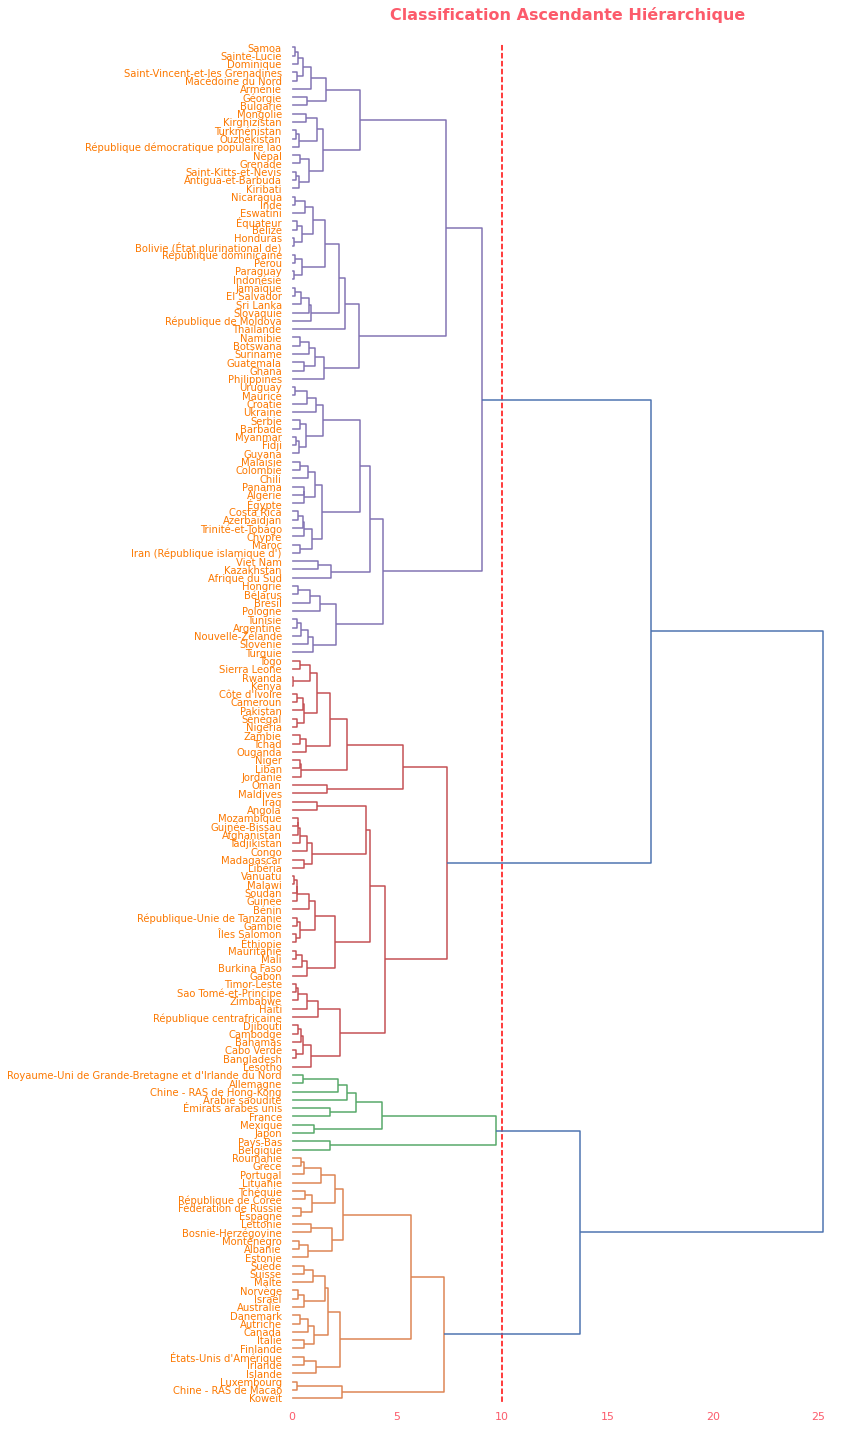

In [16]:
Z = linkage(X_trans, 'ward')
plot_dendrogram(Z, names, 'right')
plt.savefig("CAH",facecolor='none')

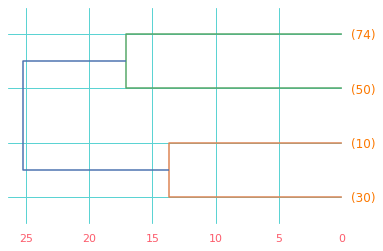

In [17]:
dendrogram(Z, p=4, truncate_mode='lastp', leaf_font_size=12, orientation='left');
plt.savefig("dendo_simplify",facecolor='none')

Nous pouvons ajouter un colonne a notre jeu de données pour inqiuer les clusters correspondants

# 

In [18]:
cluster = fcluster(Z, t=4, criterion='maxclust')
df_cluster = pd.DataFrame({'Zone' : df.index.tolist(),'Cluster CAH' : cluster})
df_cluster = df_cluster.sort_values(['Cluster CAH', 'Zone'])
df_cluster.head()

Zone  Cluster CAH
2              Albanie            1
10           Australie            1
11            Autriche            1
19  Bosnie-Herzégovine            1
29              Canada            1

# 
🔎 Visualisons nos données par clusters . 
# 

In [19]:
df_cluster = pd.merge(df, df_cluster, on='Zone')
df_cluster.head()

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan                                          1997.0   
1  Afrique du Sud                                          2987.0   
2         Albanie                                          3400.0   
3         Algérie                                          3345.0   
4       Allemagne                                          3559.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          
3                                              92.85          
4                                             104.07          

   Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
0                  12.48            2058.4              0.00   
1                   6.19           13860.3             78.71   
2                  -0.68           12771.0             25.49   
3                   8.52           11737.4             99.28   
4                   1.83           53071.5             88.54   

   V-Importations - Quantité  Cluster CAH  
0                       29.0            3  
1                      514.0            4  
2                       38.0            1  
3                        2.0            4  
4                      842.0            2

In [20]:
df_cluster_gb= df_cluster.groupby('Cluster CAH').mean()
df_cluster_gb

Disponibilité alimentaire (Kcal/personne/jour)  \
Cluster CAH                                                   
1                                               3407.333333   
2                                               3343.800000   
3                                               2411.240000   
4                                               2889.635135   

             Disponibilité de protéines en quantité (g/personne/jour)  \
Cluster CAH                                                             
1                                                   108.271333          
2                                                   103.827000          
3                                                    62.027000          
4                                                    80.532838          

             Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Cluster CAH                                                              
1                         1.936000      47498.710000         76.991667   
2                         3.019000      48504.940000        118.062000   
3                        10.971000       5468.666000         28.647600   
4                         3.821486      15578.272973         73.703378   

             V-Importations - Quantité  
Cluster CAH                             
1                            75.000000  
2                           717.600000  
3                            34.640000  
4                            40.675676

# 
Normalisons les données pour les observer sur une heatmap
# 

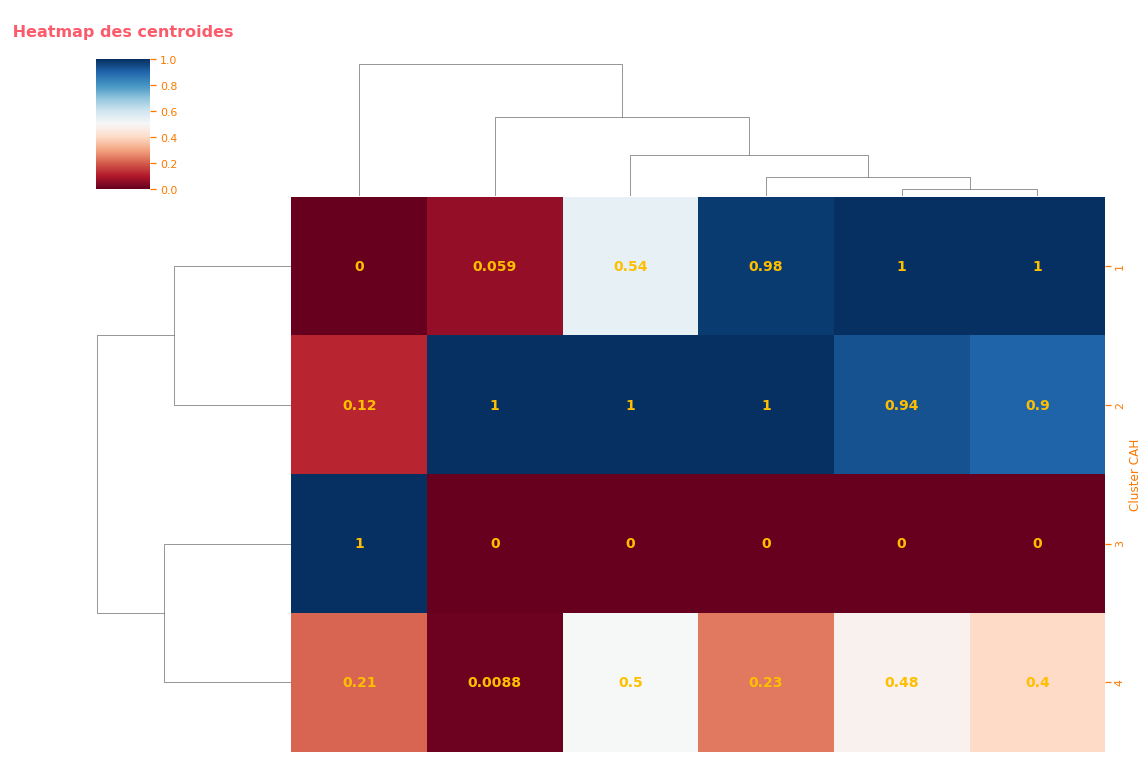

In [21]:
sns.clustermap(df_cluster_gb, figsize=(15, 10), annot=True, standard_scale=1, 
               cmap='RdBu', xticklabels=False, 
               annot_kws={"size": 14, "color": "#ffbf00", "fontweight":'bold'}, yticklabels=True)
plt.title('\n Heatmap des centroides \n', fontsize=16, fontweight='bold')
plt.savefig("heatmap",facecolor='none')

##
# TODO
# ANALYSE DE LA HEATMAP A FAIRE
##

Groupe 2 : 
- ✅ Importation importante
- ✅ Haut niveau d'autosufisance
- ✅ PIB/ habitant
- ❌ Demographic evo


Groupe 4 : 
- ✅ Dispo Alimentaire
- ✅ Dispo de protéines
- ❌ Demographic evo


In [22]:
df_cluster_copy=df_cluster.reset_index()

In [23]:
CAH1=df_cluster_copy[df_cluster_copy['Cluster CAH']==1]
CAH2=df_cluster_copy[df_cluster_copy['Cluster CAH']==2]
CAH3=df_cluster_copy[df_cluster_copy['Cluster CAH']==3]
CAH4=df_cluster_copy[df_cluster_copy['Cluster CAH']==4]
print('Cluster 1 :', 'Nombre de pays:', len(CAH1), CAH1['Zone'].unique())
print('--------------------------------------------------------------------------------------')
print('Cluster 2 :','Nombre de pays:', len(CAH2), CAH2['Zone'].unique())
print('--------------------------------------------------------------------------------------')
print('Cluster 3 :','Nombre de pays:', len(CAH3), CAH3['Zone'].unique())
print('--------------------------------------------------------------------------------------')
print('Cluster 4 :','Nombre de pays:', len(CAH4), CAH4['Zone'].unique())
print('--------------------------------------------------------------------------------------')

Cluster 1 : Nombre de pays: 30 ['Albanie' 'Australie' 'Autriche' 'Bosnie-Herzégovine' 'Canada'
 'Chine - RAS de Macao' 'Danemark' 'Espagne' 'Estonie' 'Finlande'
 'Fédération de Russie' 'Grèce' 'Irlande' 'Islande' 'Israël' 'Italie'
 'Koweït' 'Lettonie' 'Lituanie' 'Luxembourg' 'Malte' 'Monténégro'
 'Norvège' 'Portugal' 'Roumanie' 'République de Corée' 'Suisse' 'Suède'
 'Tchéquie' "États-Unis d'Amérique"]
--------------------------------------------------------------------------------------
Cluster 2 : Nombre de pays: 10 ['Allemagne' 'Arabie saoudite' 'Belgique' 'Chine - RAS de Hong-Kong'
 'France' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'Émirats arabes unis']
--------------------------------------------------------------------------------------
Cluster 3 : Nombre de pays: 50 ['Afghanistan' 'Angola' 'Bahamas' 'Bangladesh' 'Burkina Faso' 'Bénin'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Congo' "Côte d'Ivoire" 'Djibouti'
 'Gabon' 'Gambie' 'Guinée' 'Gu

In [24]:
df_cluster.head(3)

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan                                          1997.0   
1  Afrique du Sud                                          2987.0   
2         Albanie                                          3400.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          
2                                             119.50          

   Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
0                  12.48            2058.4              0.00   
1                   6.19           13860.3             78.71   
2                  -0.68           12771.0             25.49   

   V-Importations - Quantité  Cluster CAH  
0                       29.0            3  
1                      514.0            4  
2                       38.0            1

🕵️‍♂️ 🕵️‍♂️ Regardons de plus pres nos clusters en fonction des min et max de certaines de nos variables selectionnées 🕵️‍♂️ 🕵️‍♂️

In [25]:
minPIB = df_cluster_gb.index[df_cluster_gb['PIB/Habitant ($)'] == min(df_cluster_gb['PIB/Habitant ($)'])][0]
maxDemoE = df_cluster_gb.index[df_cluster_gb['Demographic Evolution'] == max(df_cluster_gb['Demographic Evolution'])][0]
minAutoS = df_cluster_gb.index[df_cluster_gb['V-Autosuffisance'] == min(df_cluster_gb['V-Autosuffisance'])][0]
minDispoP = df_cluster_gb.index[df_cluster_gb['Demographic Evolution'] == min(df_cluster_gb['Demographic Evolution'])][0]
maxImport = df_cluster_gb.index[df_cluster_gb['V-Importations - Quantité'] == max(df_cluster_gb['V-Importations - Quantité'])][0]

In [26]:
minPIB

3

In [27]:
Df_ACP_CR=df_cluster.copy()
Df_ACP_CR=Df_ACP_CR.set_index('Zone')

In [28]:
Df_ACP_CR.iloc[:,[0,1,2,3,4,5]] = Df_ACP_CR.iloc[:,[0,1,2,3,4,5]].sub(Df_ACP_CR.iloc[:,[0,1,2,3,4,5]].mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
Df_ACP_CR.iloc[:,[0,1,2,3,4,5]] = Df_ACP_CR.iloc[:,[0,1,2,3,4,5]].div(Df_ACP_CR.iloc[:,[0,1,2,3,4,5]].std())


In [29]:
infosurdf(Df_ACP_CR)

Disponibilité alimentaire (Kcal/personne/jour)  \
type de la colonne                                               float64   
nombre de valeurs NaN                                                  0   
valeurs nulles en %                                                  0.0   
nombre de valeurs uniques                                            158   
nombre de valeurs totales                                            164   

                          Disponibilité de protéines en quantité (g/personne/jour)  \
type de la colonne                                                   float64         
nombre de valeurs NaN                                                      0         
valeurs nulles en %                                                      0.0         
nombre de valeurs uniques                                                161         
nombre de valeurs totales                                                164         

                          Demographic Evolution PIB/Habitant ($)  \
type de la colonne                      float64          float64   
nombre de valeurs NaN                         0                0   
valeurs nulles en %                         0.0              0.0   
nombre de valeurs uniques                   155              164   
nombre de valeurs totales                   164              164   

                          V-Autosuffisance V-Importations - Quantité  \
type de la colonne                 float64                   float64   
nombre de valeurs NaN                    0                         0   
valeurs nulles en %                    0.0                       0.0   
nombre de valeurs uniques              112                        81   
nombre de valeurs totales              164                       164   

                          Cluster CAH  
type de la colonne              int32  
nombre de valeurs NaN               0  
valeurs nulles en %               0.0  
nombre de valeurs uniques           4  
nombre de valeurs totales         164

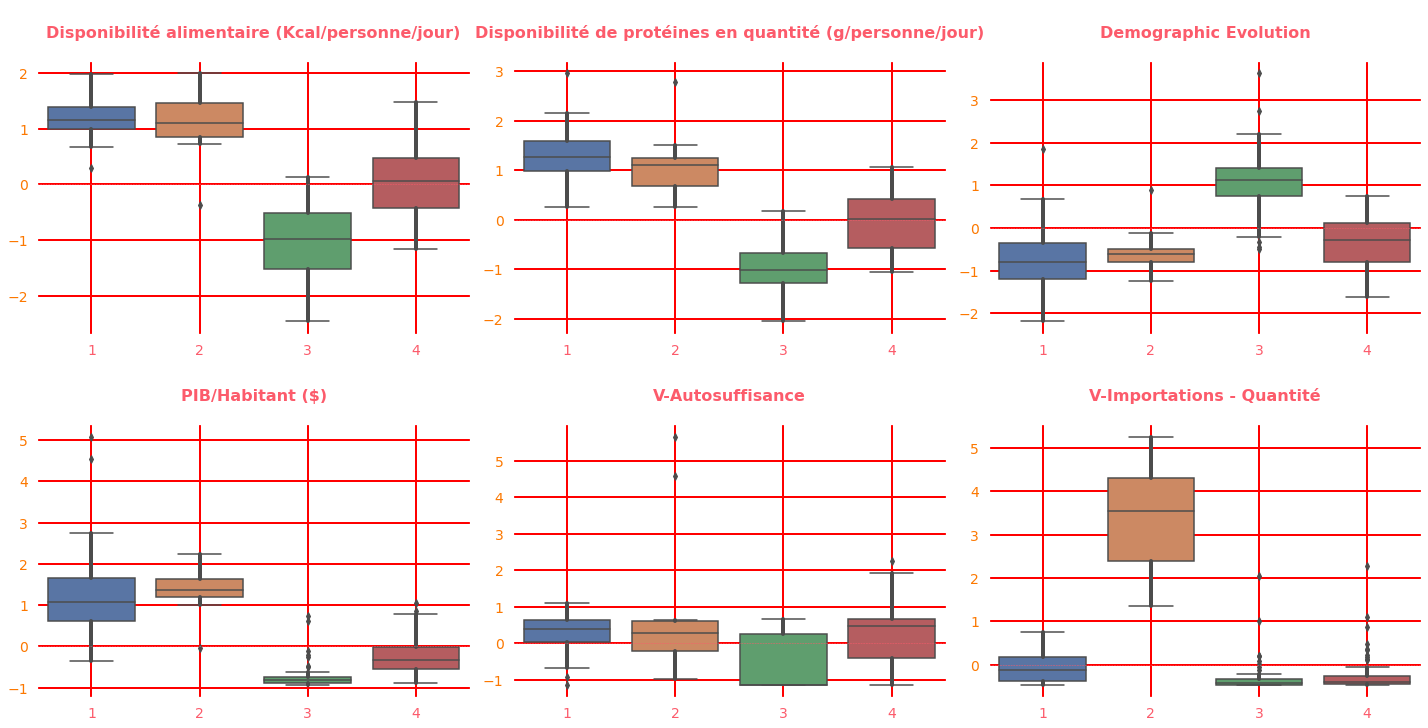

In [30]:
fig = plt.figure(figsize=(20,15),constrained_layout=False)
i = 331
count=100
for var in Df_ACP_CR.columns[:-1] :
    threshold =Df_ACP_CR[var].mean()
    ax = fig.add_subplot(i)
    sns.boxplot(x='Cluster CAH',y=var,data=Df_ACP_CR, 
           whiskerprops = { 'linewidth': 4}).set(xlabel='',ylabel='')
    ax.axhline(threshold, color ="#fc5b6b", linestyle ="--", linewidth=0.5)
    _ = plt.title("\n"+var+"\n", fontsize=16,fontweight='bold')
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.grid(color='red', linestyle='-', linewidth=2)
    plt.savefig(str(count) + ".png", transparent=True)
    i+=1    
    count += 1    

##
# TODO
# ANALYSE DES BOXPLOT A FAIRE
##

Groupe 2 : 
- ✅ Importation importante
- ✅ Haut niveau d autosufisance
- ✅ PIB/ habitant
- ❌ Demographic evo


Groupe 3 : 
- ✅ Demographic evo
- ❌ Dispo de protéines
- ❌ PIB/ habitant
- ❌ Dispo/ habitant


In [31]:
print('Cluster 2 :','Nombre de pays:', len(CAH2), CAH2['Zone'].unique())

Cluster 2 : Nombre de pays: 10 ['Allemagne' 'Arabie saoudite' 'Belgique' 'Chine - RAS de Hong-Kong'
 'France' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'Émirats arabes unis']


In [32]:
CAH2=CAH2.set_index('Zone').drop('index', axis=1)
CAH2.head(3)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                              
Allemagne                                                3559.0   
Arabie saoudite                                          3194.0   
Belgique                                                 3770.0   

                 Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                        
Allemagne                                                   104.07          
Arabie saoudite                                              87.51          
Belgique                                                    101.35          

                 Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Zone                                                                         
Allemagne                         1.83           53071.5             88.54   
Arabie saoudite                  10.15           47306.2             46.39   
Belgique                          2.38           50442.3            319.31   

                 V-Importations - Quantité  Cluster CAH  
Zone                                                     
Allemagne                            842.0            2  
Arabie saoudite                      722.0            2  
Belgique                             338.0            2

#
# K-MEANS
#

#
## Inertie du modèle
#

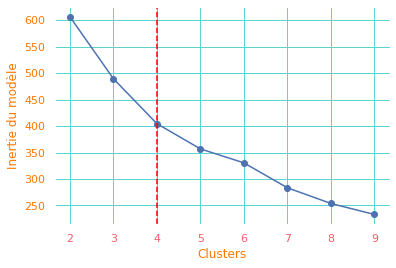

In [33]:
inerties=[]
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=3452)
    km.fit(X_scaled)
    inerties.append(km.inertia_)

plt.plot(range(2, 10), inerties, marker='o')

plt.xlabel('Clusters')
plt.ylabel('Inertie du modèle')
plt.axvline(linestyle='--', x=4,color ="red") 
plt.savefig("inertie_kmeans",facecolor='none')
plt.show()


In [34]:
from kneed import KneeLocator

kl = KneeLocator (range(2, 10), inerties, curve="convex", direction="decreasing")
print('Le nombre optimal de clusters est de', kl.elbow)

Le nombre optimal de clusters est de 4


2         3         4         5         6  \
coefficient de silhouette  0.382343  0.388965  0.308834  0.283325  0.290142   

                                  7         8         9  
coefficient de silhouette  0.283818  0.326316  0.313927

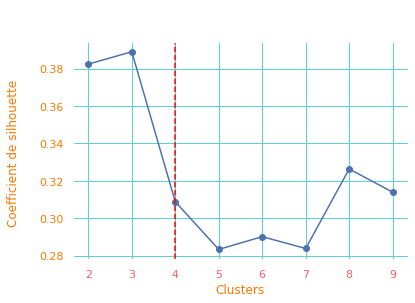

In [35]:
silhouette = []
k_range = range(2, 10)
for num_cls in range(2, 10):
    modelkm = KMeans(n_clusters = num_cls)
    modelkm.fit_predict(X_trans)
    cluster_labels = modelkm.fit_predict(X_trans)
    silh = metrics.silhouette_score(X_trans, cluster_labels)
    silhouette.append(silh)
    
plt.plot(range(2, 10), silhouette, marker = 'o')
plt.xlabel('Clusters')    
plt.axvline(linestyle='--', x=4,color ="red") 
plt.ylabel('Coefficient de silhouette \n')
plt.title(' \n', fontsize=16, fontweight='bold')
plt.savefig("silhouette",facecolor='none')
plt.show
silhouette = pd.DataFrame(silhouette, index = np.arange(2, 10), columns=['coefficient de silhouette']).T
silhouette

In [36]:
df.head(2)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                             1997.0   
Afrique du Sud                                          2987.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 54.09          
Afrique du Sud                                              83.36          

                Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Zone                                                                        
Afghanistan                     12.48            2058.4              0.00   
Afrique du Sud                   6.19           13860.3             78.71   

                V-Importations - Quantité  
Zone                                       
Afghanistan                          29.0  
Afrique du Sud                      514.0

In [37]:
X=df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).describe().round(2)

Disponibilité alimentaire (Kcal/personne/jour)  \
count                                          164.00   
mean                                            -0.00   
std                                              1.00   
min                                             -2.47   
25%                                             -0.78   
50%                                              0.01   
75%                                              0.86   
max                                              2.01   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                             164.00          
mean                                               -0.00          
std                                                 1.00          
min                                                -2.06          
25%                                                -0.84          
50%                                                -0.01          
75%                                                 0.75          
max                                                 2.97          

       Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
count                 164.00            164.00            164.00   
mean                   -0.00             -0.00              0.00   
std                     1.00              1.00              1.00   
min                    -2.19             -0.94             -1.14   
25%                    -0.73             -0.74             -1.07   
50%                    -0.12             -0.34              0.25   
75%                     0.69              0.41              0.64   
max                     3.65              5.10              5.67   

       V-Importations - Quantité  
count                     164.00  
mean                       -0.00  
std                         1.00  
min                        -0.46  
25%                        -0.45  
50%                        -0.38  
75%                        -0.04  
max                         5.27

In [38]:
model_kmeans = KMeans(n_clusters=4,random_state=3425)
model_kmeans.fit(X_scaled)
clusters2 =  model_kmeans.fit_predict(X_scaled)
df_kmeans = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
df_kmeans["Cluster K_Means"] = clusters2+1
df_kmeans

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                 -1.932252   
Afrique du Sud                                               0.268600   
Albanie                                                      1.186733   
Algérie                                                      1.064463   
Allemagne                                                    1.540203   
...                                                               ...   
Émirats arabes unis                                          1.120040   
Équateur                                                    -0.625079   
États-Unis d'Amérique                                        1.991489   
Éthiopie                                                    -1.249765   
Îles Salomon                                                -1.014119   

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                    -1.352730          
Afrique du Sud                                                  0.097864          
Albanie                                                         1.888929          
Algérie                                                         0.568180          
Allemagne                                                       1.124232          
...                                                                  ...          
Émirats arabes unis                                             1.282326          
Équateur                                                       -0.773880          
États-Unis d'Amérique                                           1.597026          
Éthiopie                                                       -0.780323          
Îles Salomon                                                   -1.375031          

                       Demographic Evolution  PIB/Habitant ($)  \
Zone                                                             
Afghanistan                         1.366551         -0.881597   
Afrique du Sud                      0.115848         -0.312562   
Albanie                            -1.250181         -0.365083   
Algérie                             0.579145         -0.414919   
Allemagne                          -0.751093          1.578026   
...                                      ...               ...   
Émirats arabes unis                -0.488625          2.258448   
Équateur                            0.249071         -0.420681   
États-Unis d'Amérique              -0.570149          1.907979   
Éthiopie                            1.181630         -0.883371   
Îles Salomon                        1.135897         -0.852422   

                       V-Autosuffisance  V-Importations - Quantité  \
Zone                                                                 
Afghanistan                   -1.135811                  -0.308028   
Afrique du Sud                 0.277105                   2.295086   
Albanie                       -0.678242                  -0.259722   
Algérie                        0.646355                  -0.452943   
Allemagne                      0.453563                   4.055543   
...                                 ...                        ...   
Émirats arabes unis           -0.913220                   1.860340   
Équateur                       0.659280                  -0.463678   
États-Unis d'Amérique          1.008425                   0.196494   
Éthiopie                      -1.135811                  -0.458310   
Îles Salomon                  -1.135811                  -0.431474   

                       Cluster K_Means  
Zone                                    
Afghanistan                          2  
Afrique du Sud                       4  
Albanie                              3  
Algérie           

In [39]:
df_kmeans = df_kmeans.loc[:,['Cluster K_Means']]
df_kmeans.head(3)

Cluster K_Means
Zone                           
Afghanistan                   2
Afrique du Sud                4
Albanie                       3

In [40]:
df_cluster = pd.merge(df_cluster, df_kmeans, on='Zone')
df_cluster.head(2)

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan                                          1997.0   
1  Afrique du Sud                                          2987.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              54.09          
1                                              83.36          

   Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
0                  12.48            2058.4              0.00   
1                   6.19           13860.3             78.71   

   V-Importations - Quantité  Cluster CAH  Cluster K_Means  
0                       29.0            3                2  
1                      514.0            4                4

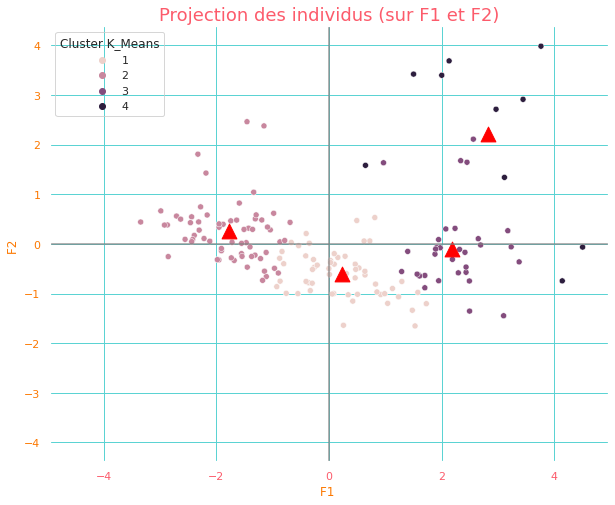

In [74]:
count = 106
x_y = [0,1]
display_factorial_planes(X_trans, x_y, clusters=df_cluster['Cluster K_Means'])


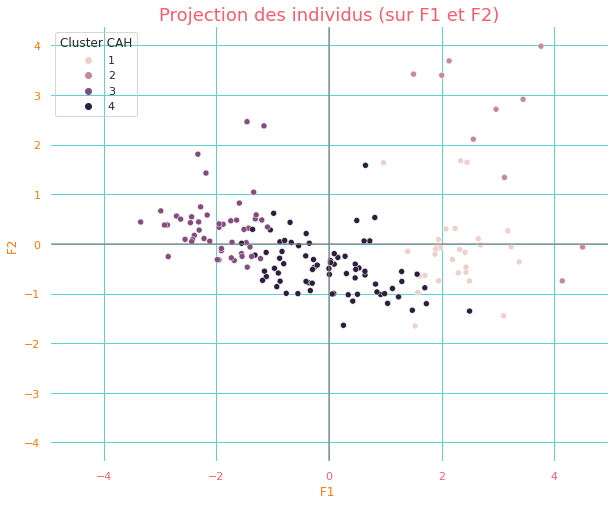

In [77]:
count = 104

x_y = [0,1]
display_factoriasl_planes(X_trans, x_y, clusters=df_cluster['Cluster CAH'])


In [43]:
df_Cluster_K_Means=df_cluster.reset_index()

for i in range(1, 5) : 
    sub_df = df_Cluster_K_Means[df_Cluster_K_Means['Cluster CAH'] == i]
    print(f"Cluster : {i}")
    zone = sub_df.Zone.values
    txt = [f"{n}" for n in zone]
    txt = " - ".join(txt)
    print('Nombre de pays: '+str(len(zone)))
    print(txt)
    print("\n")

Cluster : 1
Nombre de pays: 30
Albanie - Australie - Autriche - Bosnie-Herzégovine - Canada - Chine - RAS de Macao - Danemark - Espagne - Estonie - Finlande - Fédération de Russie - Grèce - Irlande - Islande - Israël - Italie - Koweït - Lettonie - Lituanie - Luxembourg - Malte - Monténégro - Norvège - Portugal - Roumanie - République de Corée - Suisse - Suède - Tchéquie - États-Unis d'Amérique


Cluster : 2
Nombre de pays: 10
Allemagne - Arabie saoudite - Belgique - Chine - RAS de Hong-Kong - France - Japon - Mexique - Pays-Bas - Royaume-Uni de Grande-Bretagne et d'Irlande du Nord - Émirats arabes unis


Cluster : 3
Nombre de pays: 50
Afghanistan - Angola - Bahamas - Bangladesh - Burkina Faso - Bénin - Cabo Verde - Cambodge - Cameroun - Congo - Côte d'Ivoire - Djibouti - Gabon - Gambie - Guinée - Guinée-Bissau - Haïti - Iraq - Jordanie - Kenya - Lesotho - Liban - Libéria - Madagascar - Malawi - Maldives - Mali - Mauritanie - Mozambique - Niger - Nigéria - Oman - Ouganda - Pakistan - Rw

In [44]:
for i in range(1, 5) : 
    sub_df = df_Cluster_K_Means[df_Cluster_K_Means['Cluster K_Means'] == i]
    print(f"Cluster : {i}")
    zone = sub_df.Zone.values
    txt = [f"{n}" for n in zone]
    txt = " , ".join(txt)
    print('Nombre de pays: '+str(len(zone)))
    print(txt)
    print("\n")

Cluster : 1
Nombre de pays: 57
Algérie , Argentine , Arménie , Azerbaïdjan , Barbade , Bosnie-Herzégovine , Brésil , Bulgarie , Bélarus , Chili , Chypre , Colombie , Costa Rica , Croatie , Dominique , El Salvador , Fidji , Guyana , Géorgie , Hongrie , Inde , Indonésie , Iran (République islamique d') , Jamaïque , Kazakhstan , Kiribati , Lettonie , Macédoine du Nord , Malaisie , Maroc , Maurice , Myanmar , Nicaragua , Népal , Ouzbékistan , Panama , Paraguay , Pérou , République de Moldova , République dominicaine , République démocratique populaire lao , Saint-Kitts-et-Nevis , Saint-Vincent-et-les Grenadines , Sainte-Lucie , Samoa , Serbie , Slovaquie , Sri Lanka , Suriname , Thaïlande , Trinité-et-Tobago , Tunisie , Turkménistan , Ukraine , Uruguay , Viet Nam , Égypte


Cluster : 2
Nombre de pays: 64
Afghanistan , Angola , Antigua-et-Barbuda , Bahamas , Bangladesh , Belize , Bolivie (État plurinational de) , Botswana , Burkina Faso , Bénin , Cabo Verde , Cambodge , Cameroun , Congo , C

In [45]:
Df_KM_CR=df_cluster.copy()
Df_KM_CR=Df_KM_CR.set_index('Zone')

In [46]:
Df_KM_CR.iloc[:,[0,1,2,3,4,5]] = Df_KM_CR.iloc[:,[0,1,2,3,4,5]].sub(Df_KM_CR.iloc[:,[0,1,2,3,4,5]].mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
Df_KM_CR.iloc[:,[0,1,2,3,4,5]] = Df_KM_CR.iloc[:,[0,1,2,3,4,5]].div(Df_KM_CR.iloc[:,[0,1,2,3,4,5]].std())

In [47]:
Df_KM_CR.head(3)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                          -1.926352   
Afrique du Sud                                        0.267780   
Albanie                                               1.183109   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                             -1.348599          
Afrique du Sud                                           0.097565          
Albanie                                                  1.883161          

                Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Zone                                                                        
Afghanistan                  1.362379         -0.878905         -1.132343   
Afrique du Sud               0.115495         -0.311608          0.276259   
Albanie                     -1.246364         -0.363968         -0.676171   

                V-Importations - Quantité  Cluster CAH  Cluster K_Means  
Zone                                                                     
Afghanistan                     -0.307087            3                2  
Afrique du Sud                   2.288079            4                4  
Albanie                         -0.258929            1                3

In [48]:
Df_KM_CR_GP=Df_KM_CR.groupby('Cluster K_Means').mean().drop(columns='Cluster CAH')
Df_KM_CR_GP.head(3)

Disponibilité alimentaire (Kcal/personne/jour)  \
Cluster K_Means                                                   
1                                                      0.189976   
2                                                     -0.944222   
3                                                      1.208026   

                 Disponibilité de protéines en quantité (g/personne/jour)  \
Cluster K_Means                                                             
1                                                         0.058273          
2                                                        -0.879218          
3                                                         1.304282          

                 Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Cluster K_Means                                                              
1                            -0.549350         -0.216048          0.198942   
2                             0.878536         -0.666355         -0.516138   
3                            -0.617726          1.332957          0.324286   

                 V-Importations - Quantité  
Cluster K_Means                             
1                                -0.289063  
2                                -0.265200  
3                                -0.023005

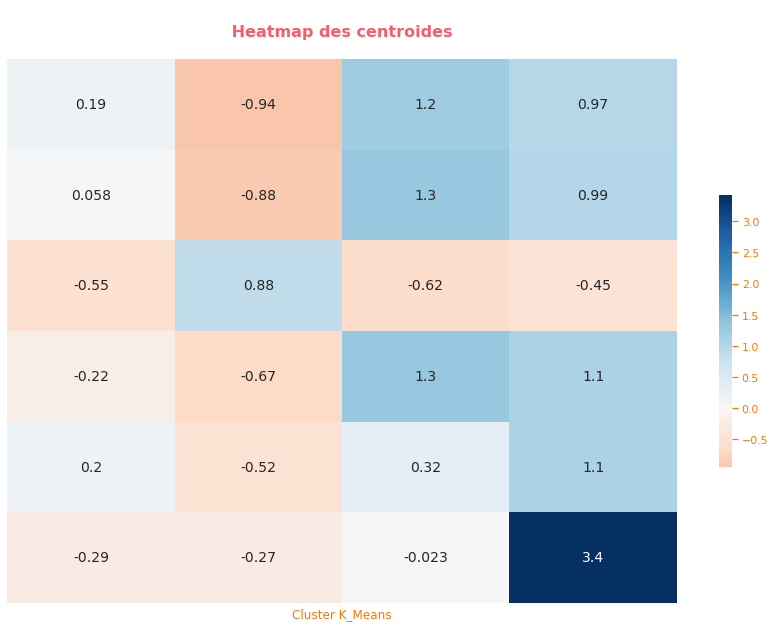

In [49]:
Df_KM_CR_T=Df_KM_CR_GP.T
fig = plt.figure(figsize=(15,10))
sns.heatmap(Df_KM_CR_T, center=0, cmap='RdBu', annot=True, annot_kws={"size": 14}, 
                xticklabels=False, yticklabels=False, cbar_kws={"shrink": 0.5})
plt.xticks(xticks=None, labels=None)
plt.title('\n Heatmap des centroides \n', fontsize=16, fontweight='bold');
plt.savefig("heatmap_centroïdes",facecolor='none')

In [50]:
Df_KM_CR_T

Cluster K_Means                                            1         2  \
Disponibilité alimentaire (Kcal/personne/jour)      0.189976 -0.944222   
Disponibilité de protéines en quantité (g/perso...  0.058273 -0.879218   
Demographic Evolution                              -0.549350  0.878536   
PIB/Habitant ($)                                   -0.216048 -0.666355   
V-Autosuffisance                                    0.198942 -0.516138   
V-Importations - Quantité                          -0.289063 -0.265200   

Cluster K_Means                                            3         4  
Disponibilité alimentaire (Kcal/personne/jour)      1.208026  0.973669  
Disponibilité de protéines en quantité (g/perso...  1.304282  0.990709  
Demographic Evolution                              -0.617726 -0.452838  
PIB/Habitant ($)                                    1.332957  1.097385  
V-Autosuffisance                                    0.324286  1.099175  
V-Importations - Quantité                          -0.023005  3.420855

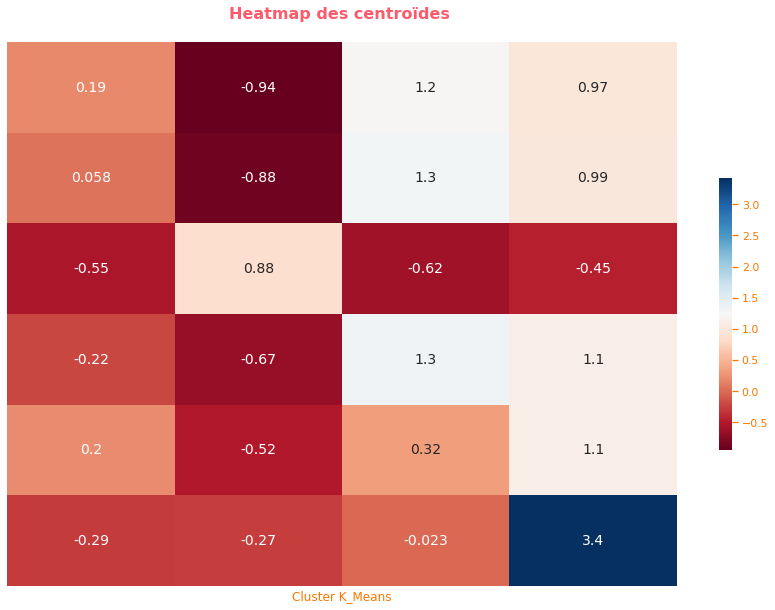

In [51]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(Df_KM_CR_T, cmap='RdBu', annot=True, annot_kws={"size": 14}, 
                xticklabels=False, yticklabels=False, cbar_kws={"shrink": 0.5})
plt.title('Heatmap des centroïdes \n', fontsize=16, fontweight='bold');
plt.savefig("heatmap_centroides",facecolor='none')

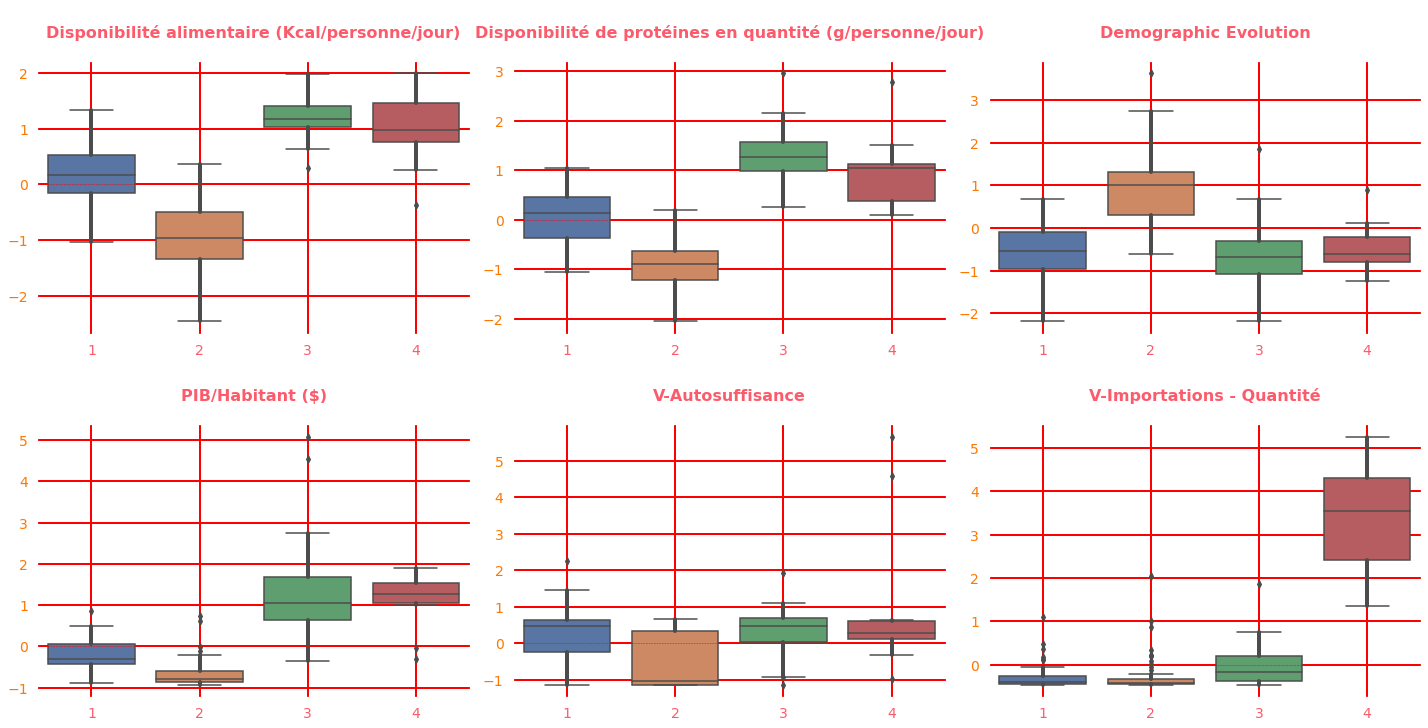

In [52]:
fig = plt.figure(figsize=(20,15),constrained_layout=False)
i = 331
count = 0


for var in Df_KM_CR.columns[:-2] :
    threshold =Df_KM_CR[var].mean()
    ax = fig.add_subplot(i)
    sns.boxplot(x='Cluster K_Means',y=var,data=Df_KM_CR,
    whiskerprops = { 'linewidth': 4}).set(xlabel='',ylabel='')
    ax.axhline(threshold, color ="red", linestyle ="--", linewidth=0.5) 
    _ = plt.title("\n"+var+"\n", fontsize=16,fontweight='bold')
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(str(count) + ".png", transparent=True)
    plt.grid(color='red', linestyle='-', linewidth=2)
    i+=1
    count += 1


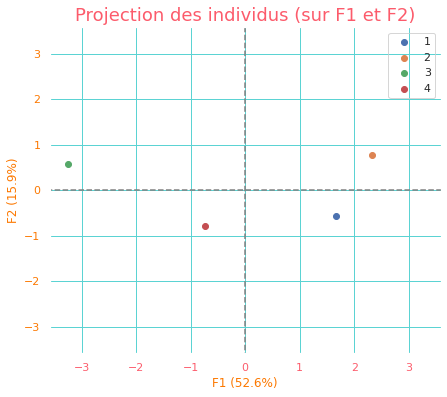

<Figure size 432x288 with 0 Axes>

In [53]:
X2 = df_cluster_gb.values
std_scale = preprocessing.StandardScaler().fit(X2)
X2_scaled = std_scale.transform(X2)

X2_projected = pca.transform(X2_scaled)
display_factorial_planesV2(X2_projected, n_comp, pca, [(0,1)], illustrative_var=df_cluster_gb.index)
plt.savefig("centroid.png")
plt.savefig("projection_centroides",facecolor='none')
plt.show()

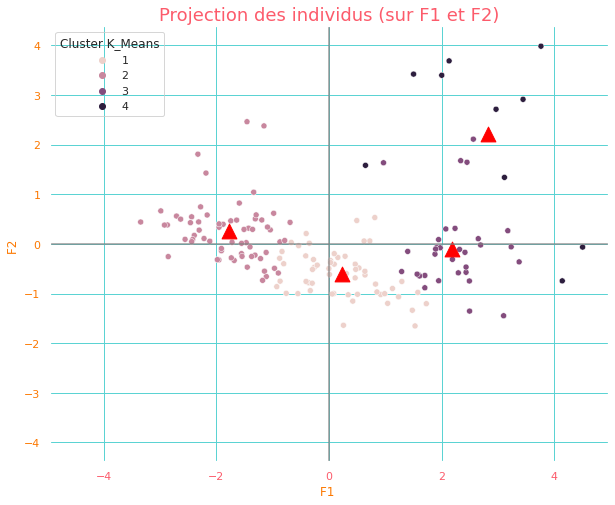

In [54]:
count = 10.49

x_y = [0,1]
display_factorial_planes(X_trans, x_y, clusters=Df_KM_CR['Cluster K_Means'])

In [55]:
Df_KM_CR

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                 -1.926352   
Afrique du Sud                                               0.267780   
Albanie                                                      1.183109   
Algérie                                                      1.061213   
Allemagne                                                    1.535500   
...                                                               ...   
Émirats arabes unis                                          1.116620   
Équateur                                                    -0.623171   
États-Unis d'Amérique                                        1.985408   
Éthiopie                                                    -1.245949   
Îles Salomon                                                -1.011022   

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                    -1.348599          
Afrique du Sud                                                  0.097565          
Albanie                                                         1.883161          
Algérie                                                         0.566445          
Allemagne                                                       1.120800          
...                                                                  ...          
Émirats arabes unis                                             1.278410          
Équateur                                                       -0.771517          
États-Unis d'Amérique                                           1.592149          
Éthiopie                                                       -0.777940          
Îles Salomon                                                   -1.370833          

                       Demographic Evolution  PIB/Habitant ($)  \
Zone                                                             
Afghanistan                         1.362379         -0.878905   
Afrique du Sud                      0.115495         -0.311608   
Albanie                            -1.246364         -0.363968   
Algérie                             0.577377         -0.413652   
Allemagne                          -0.748800          1.573208   
...                                      ...               ...   
Émirats arabes unis                -0.487133          2.251552   
Équateur                            0.248311         -0.419396   
États-Unis d'Amérique              -0.568408          1.902153   
Éthiopie                            1.178022         -0.880674   
Îles Salomon                        1.132429         -0.849819   

                       V-Autosuffisance  V-Importations - Quantité  \
Zone                                                                 
Afghanistan                   -1.132343                  -0.307087   
Afrique du Sud                 0.276259                   2.288079   
Albanie                       -0.676171                  -0.258929   
Algérie                        0.644382                  -0.451560   
Allemagne                      0.452178                   4.043160   
...                                 ...                        ...   
Émirats arabes unis           -0.910431                   1.854659   
Équateur                       0.657267                  -0.462262   
États-Unis d'Amérique          1.005346                   0.195894   
Éthiopie                      -1.132343                  -0.456911   
Îles Salomon                  -1.132343                  -0.430157   

                       Cluster CAH  Cluster K_Means  
Zone                                                 
Afghanistan                      3                2  
Afrique du Sud                   4                4  
Albanie

In [56]:
df

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                    1997.0   
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Algérie                                                        3345.0   
Allemagne                                                      3559.0   
...                                                               ...   
Émirats arabes unis                                            3370.0   
Équateur                                                       2585.0   
États-Unis d'Amérique                                          3762.0   
Éthiopie                                                       2304.0   
Îles Salomon                                                   2410.0   

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                        54.09          
Afrique du Sud                                                     83.36          
Albanie                                                           119.50          
Algérie                                                            92.85          
Allemagne                                                         104.07          
...                                                                  ...          
Émirats arabes unis                                               107.26          
Équateur                                                           65.77          
États-Unis d'Amérique                                             113.61          
Éthiopie                                                           65.64          
Îles Salomon                                                       53.64          

                       Demographic Evolution  PIB/Habitant ($)  \
Zone                                                             
Afghanistan                            12.48            2058.4   
Afrique du Sud                          6.19           13860.3   
Albanie                                -0.68           12771.0   
Algérie                                 8.52           11737.4   
Allemagne                               1.83           53071.5   
...                                      ...               ...   
Émirats arabes unis                     3.15           67183.6   
Équateur                                6.86           11617.9   
États-Unis d'Amérique                   2.74           59914.8   
Éthiopie                               11.55            2021.6   
Îles Salomon                           11.32            2663.5   

                       V-Autosuffisance  V-Importations - Quantité  
Zone                                                                
Afghanistan                        0.00                       29.0  
Afrique du Sud                    78.71                      514.0  
Albanie                           25.49                       38.0  
Algérie                           99.28                        2.0  
Allemagne                         88.54                      842.0  
...                                 ...                        ...  
Émirats arabes unis               12.40                      433.0  
Équateur                         100.00                        0.0  
États-Unis d'Amérique            119.45                      123.0  
Éthiopie                           0.00                        1.0  
Îles Salomon                       0.00                        6.0  

[164 rows x 6 columns]

6
Dim 1 :  53.0 %
Dim 2 :  16.0 %
Dim 3 :  13.0 %
Dim 4 :  10.0 %
Dim 5 :  6.0 %


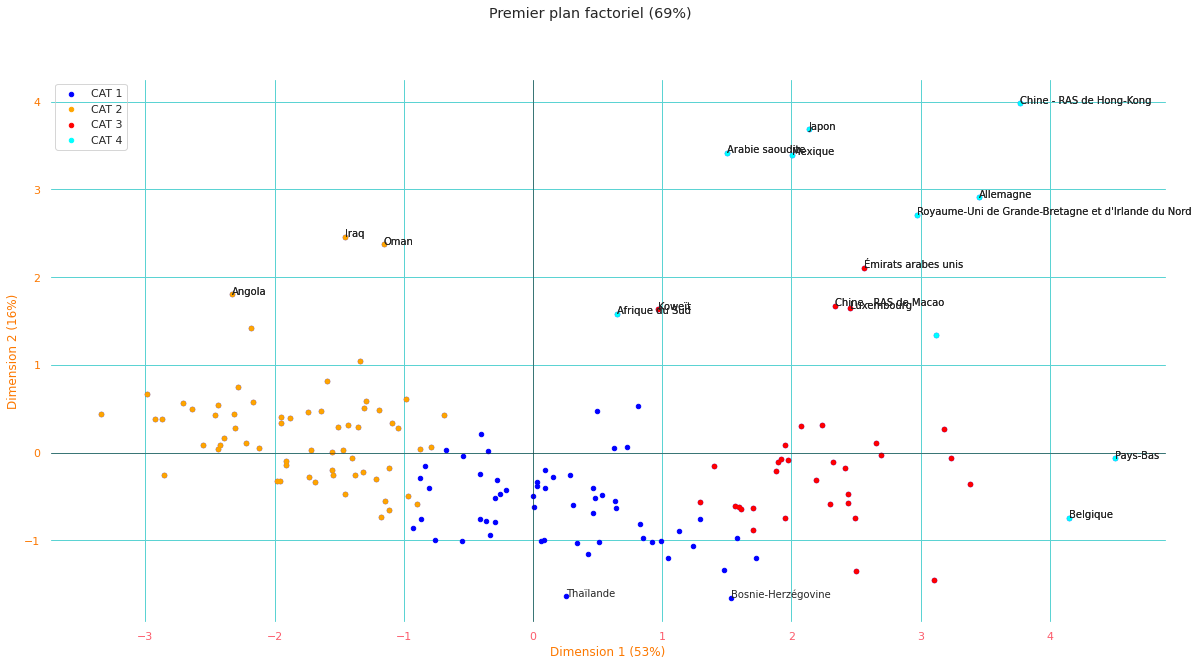

In [57]:
dfk=Df_KM_CR.copy()

data_pca = dfk[[
                  'Disponibilité alimentaire (Kcal/personne/jour)', 
                  'Disponibilité de protéines en quantité (g/personne/jour)',
                  'Demographic Evolution',
                  'PIB/Habitant ($)',
                  'V-Autosuffisance', 'V-Importations - Quantité'
                  ]]

n_comp = len(data_pca.columns)
print(n_comp)

data_pca = data_pca.fillna(0)
data_pca.head(2)

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = df.index # ou data.index pour avoir les intitulés
#features = main_df.columns
features = data_pca.columns
features


# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = df.index # ou data.index pour avoir les intitulés
#features = main_df.columns
features = data_pca.columns
features


# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)



Dims = np.round((pca.explained_variance_ratio_*100),0)
print("Dim 1 : ",Dims[0],"%")
print("Dim 2 : ",Dims[1],"%")
print("Dim 3 : ",Dims[2],"%")
print("Dim 4 : ",Dims[3],"%")
print("Dim 5 : ",Dims[4],"%")

#Représentation des individus
pca_tr = pca.transform(X_scaled)


# Transformation en DataFrame pandas
pca_df = pd.DataFrame({
    "Dim1" : pca_tr[:,0], 
    "Dim2" : pca_tr[:,1],
    "Country" : Df_KM_CR.index
})

# Résultat (premières lignes)
pca_df.head()
dfk=Df_KM_CR.copy()

dfkm = dfk[dfk['Cluster K_Means']==1]
merge_df1= pca_df.merge(df, left_on='Country', right_on='Zone',how='inner')

dfkm = dfk[dfk['Cluster K_Means']==2]
merge_df2= pca_df.merge(dfkm, left_on='Country', right_on='Zone',how='inner')

dfkm = dfk[dfk['Cluster K_Means']==3]
merge_df3= pca_df.merge(dfkm, left_on='Country', right_on='Zone',how='inner')

dfkm = dfk[dfk['Cluster K_Means']==4]
merge_df4= pca_df.merge(dfkm, left_on='Country', right_on='Zone',how='inner')

fig, ax = plt.subplots(figsize = (20,10))

merge_df1.plot.scatter("Dim1", "Dim2", ax = ax, c="blue") # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in merge_df1.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 10)


merge_df2.plot.scatter("Dim1", "Dim2", ax = ax, c="orange") # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in merge_df2.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 10)

        
merge_df3.plot.scatter("Dim1", "Dim2", ax = ax, c="red") # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in merge_df3.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 10)

        
merge_df4.plot.scatter("Dim1", "Dim2", ax = ax, c="cyan") # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in merge_df4.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 10)

Tprecision = np.round((pca.explained_variance_ratio_*100),0)
precision = Tprecision[0] + Tprecision[1]


plt.xlabel("Dimension 1 (" + str(int(Tprecision[0])) + "%)") 
plt.ylabel("Dimension 2 (" + str(int(Tprecision[1])) + "%)")

plt.suptitle("Premier plan factoriel ("+str(int(precision))+"%)")
ax.legend(['CAT 1', 'CAT 2', 'CAT 3', 'CAT 4'], loc='upper left')


plt.axvline(x = 0.0, color ="k", linestyle ="-", linewidth=0.5)

plt.axhline(y = 0.0, color ="k", linestyle ="-", linewidth=0.5)


plt.savefig("ACP_Individus",facecolor='none')
plt.show()

In [60]:
df_cluster=df_cluster.reset_index()
KMEANS4=df_cluster[df_cluster['Cluster K_Means']==4]
print('Cluster 4 :','Nombre de pays:', len(KMEANS4), KMEANS4['Zone'].unique())

Cluster 4 : Nombre de pays: 10 ['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Belgique'
 'Chine - RAS de Hong-Kong' 'France' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [61]:
KMEANS4 = KMEANS4.drop('index', axis=1).set_index('Zone')
KMEANS4.head(2)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afrique du Sud                                          2987.0   
Allemagne                                               3559.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afrique du Sud                                              83.36          
Allemagne                                                  104.07          

                Demographic Evolution  PIB/Habitant ($)  V-Autosuffisance  \
Zone                                                                        
Afrique du Sud                   6.19           13860.3             78.71   
Allemagne                        1.83           53071.5             88.54   

                V-Importations - Quantité  Cluster CAH  Cluster K_Means  
Zone                                                                     
Afrique du Sud                      514.0            4                4  
Allemagne                           842.0            2                4

In [62]:
CAH2.head(10)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Allemagne                                                                                   3559.0   
Arabie saoudite                                                                             3194.0   
Belgique                                                                                    3770.0   
Chine - RAS de Hong-Kong                                                                    3353.0   
France                                                                                      3556.0   
Japon                                                                                       2699.0   
Mexique                                                                                     3258.0   
Pays-Bas                                                                                    3251.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                          3428.0   
Émirats arabes unis                                                                         3370.0   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Allemagne                                                                                      104.07          
Arabie saoudite                                                                                 87.51          
Belgique                                                                                       101.35          
Chine - RAS de Hong-Kong                                                                       137.88          
France                                                                                         112.08          
Japon                                                                                           86.52          
Mexique                                                                                         93.30          
Pays-Bas                                                                                       104.43          
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                             103.87          
Émirats arabes unis                                                                            107.26          

                                                    Demographic Evolution  \
Zone                                                                        
Allemagne                                                            1.83   
Arabie saoudite                                                     10.15   
Belgique                                                             2.38   
Chine - RAS de Hong-Kong                                             3.07   
France                                                               1.49   
Japon                                                               -0.63   
Mexique                                                              5.01   
Pays-Bas                                                             1.06   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                   2.68   
Émirats arabes unis                                                  3.15   

                                                    PIB/Habitant ($)  \
Zone                                                                   
Allemagne                                                    53071.5   
Arabie saoudite                                              47306.2   
Belgique                                                     50442.3   
Chine - RAS de Hong-Kong                                     59842.2   
France                                                       44577.1   
Japon                                                

In [63]:
result = KMEANS4.merge(CAH2, on='Zone', how='inner')
result=result.drop(columns=[col for col in result.columns if '_y' in col])
result.rename(columns=lambda x: x.replace("_x", ""), inplace=True)
result

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Allemagne                                                                                   3559.0   
Arabie saoudite                                                                             3194.0   
Belgique                                                                                    3770.0   
Chine - RAS de Hong-Kong                                                                    3353.0   
France                                                                                      3556.0   
Japon                                                                                       2699.0   
Mexique                                                                                     3258.0   
Pays-Bas                                                                                    3251.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                          3428.0   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Allemagne                                                                                      104.07          
Arabie saoudite                                                                                 87.51          
Belgique                                                                                       101.35          
Chine - RAS de Hong-Kong                                                                       137.88          
France                                                                                         112.08          
Japon                                                                                           86.52          
Mexique                                                                                         93.30          
Pays-Bas                                                                                       104.43          
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                             103.87          

                                                    Demographic Evolution  \
Zone                                                                        
Allemagne                                                            1.83   
Arabie saoudite                                                     10.15   
Belgique                                                             2.38   
Chine - RAS de Hong-Kong                                             3.07   
France                                                               1.49   
Japon                                                               -0.63   
Mexique                                                              5.01   
Pays-Bas                                                             1.06   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                   2.68   

                                                    PIB/Habitant ($)  \
Zone                                                                   
Allemagne                                                    53071.5   
Arabie saoudite                                              47306.2   
Belgique                                                     50442.3   
Chine - RAS de Hong-Kong                                     59842.2   
France                                                       44577.1   
Japon                                                        41444.2   
Mexique                                                      19721.3   
Pays-Bas                                                     55088.6   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...           46372.4   

                                                    V-A

In [64]:
result.head(4)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                       
Allemagne                                                         3559.0   
Arabie saoudite                                                   3194.0   
Belgique                                                          3770.0   
Chine - RAS de Hong-Kong                                          3353.0   

                          Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                 
Allemagne                                                            104.07          
Arabie saoudite                                                       87.51          
Belgique                                                             101.35          
Chine - RAS de Hong-Kong                                             137.88          

                          Demographic Evolution  PIB/Habitant ($)  \
Zone                                                                
Allemagne                                  1.83           53071.5   
Arabie saoudite                           10.15           47306.2   
Belgique                                   2.38           50442.3   
Chine - RAS de Hong-Kong                   3.07           59842.2   

                          V-Autosuffisance  V-Importations - Quantité  \
Zone                                                                    
Allemagne                            88.54                      842.0   
Arabie saoudite                      46.39                      722.0   
Belgique                            319.31                      338.0   
Chine - RAS de Hong-Kong              8.96                      907.0   

                          Cluster CAH  Cluster K_Means  
Zone                                                    
Allemagne                           2                4  
Arabie saoudite                     2                4  
Belgique                            2                4  
Chine - RAS de Hong-Kong            2                4

In [65]:
result_cr=result.copy()
result_cr.iloc[:,[0,1,2,3,4,5]] = result_cr.iloc[:,[0,1,2,3,4,5]].sub(result_cr.iloc[:,[0,1,2,3,4,5]].mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
result_cr.iloc[:,[0,1,2,3,4,5]] = result_cr.iloc[:,[0,1,2,3,4,5]].div(result_cr.iloc[:,[0,1,2,3,4,5]].std())
result_cr

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Allemagne                                                                                 0.719940   
Arabie saoudite                                                                          -0.484850   
Belgique                                                                                  1.416408   
Chine - RAS de Hong-Kong                                                                  0.039976   
France                                                                                    0.710038   
Japon                                                                                    -2.118744   
Mexique                                                                                  -0.273599   
Pays-Bas                                                                                 -0.296705   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                        0.287536   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Allemagne                                                                                    0.040418          
Arabie saoudite                                                                             -1.031443          
Belgique                                                                                    -0.135637          
Chine - RAS de Hong-Kong                                                                     2.228799          
France                                                                                       0.558872          
Japon                                                                                       -1.095521          
Mexique                                                                                     -0.656680          
Pays-Bas                                                                                     0.063719          
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                           0.027473          

                                                    Demographic Evolution  \
Zone                                                                        
Allemagne                                                       -0.380431   
Arabie saoudite                                                  2.314618   
Belgique                                                        -0.202273   
Chine - RAS de Hong-Kong                                         0.021235   
France                                                          -0.490565   
Japon                                                           -1.177284   
Mexique                                                          0.649648   
Pays-Bas                                                        -0.629852   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...              -0.105095   

                                                    PIB/Habitant ($)  \
Zone                                                                   
Allemagne                                                   0.577703   
Arabie saoudite                                             0.076250   
Belgique                                                    0.349021   
Chine - RAS de Hong-Kong                                    1.166604   
France                                                     -0.161120   
Japon                                                      -0.433613   
Mexique                                                    -2.323022   
Pays-Bas                                                    0.753146   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...         -0.004969   

                                                    V-A

In [66]:
data=result.copy()
for col in data.columns[:-2]:
    bins = [0, data[col].quantile(0), data[col].quantile(0.4), data[col].quantile(0.6), data[col].quantile(0.8), data[col].max()+1]
    data[col +' Rankings'] = pd.cut(data[col].rank(pct=True), bins=5)
for col in data.columns:
    data[col] = data[col].replace({
    pd.Interval(0.11, 0.289, closed='right'): '🌟',
    pd.Interval(0.127, 0.302, closed='right'): '🌟',
    pd.Interval(0.0051, 0.205, closed='right'): '🌟',
    pd.Interval(0.289, 0.467, closed='right'): '🌟🌟',
    pd.Interval(0.302, 0.477, closed='right'): '🌟🌟',
    pd.Interval(0.205, 0.404, closed='right'): '🌟🌟',
    pd.Interval(0.467, 0.644, closed='right'): '🌟🌟🌟', 
    pd.Interval(0.477, 0.651, closed='right'): '🌟🌟🌟',
    pd.Interval(0.438, 0.626, closed='right'): '🌟🌟🌟',
    pd.Interval(0.644, 0.822, closed='right'): '🌟🌟🌟🌟',
    pd.Interval(0.651, 0.826, closed='right'): '🌟🌟🌟🌟', 
    pd.Interval(0.626, 0.813, closed='right'): '🌟🌟🌟🌟',
    pd.Interval(0.822, 1.0, closed='right'): '🌟🌟🌟🌟🌟', 
    pd.Interval(0.826, 1.0, closed='right'): '🌟🌟🌟🌟🌟',
    pd.Interval(0.813, 1, closed='right'): '🌟🌟🌟🌟🌟'
})
cols_to_move = [(8, 1), (9, 3), (10, 5), (11, 7), (12, 9),(13,11)]

for col_index, location in cols_to_move:
    data.insert(location, data.columns[col_index], data.pop(data.columns[col_index]))

    
for col_name in data.columns:
    if 'Rankings' in col_name:
        data = data.rename(columns={col_name: ' Rang'})
    
data

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Allemagne                                                                                   3559.0   
Arabie saoudite                                                                             3194.0   
Belgique                                                                                    3770.0   
Chine - RAS de Hong-Kong                                                                    3353.0   
France                                                                                      3556.0   
Japon                                                                                       2699.0   
Mexique                                                                                     3258.0   
Pays-Bas                                                                                    3251.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                          3428.0   

                                                     Rang  \
Zone                                                        
Allemagne                                           🌟🌟🌟🌟🌟   
Arabie saoudite                                         🌟   
Belgique                                            🌟🌟🌟🌟🌟   
Chine - RAS de Hong-Kong                              🌟🌟🌟   
France                                               🌟🌟🌟🌟   
Japon                                                   🌟   
Mexique                                                🌟🌟   
Pays-Bas                                               🌟🌟   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...   🌟🌟🌟🌟   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Allemagne                                                                                      104.07          
Arabie saoudite                                                                                 87.51          
Belgique                                                                                       101.35          
Chine - RAS de Hong-Kong                                                                       137.88          
France                                                                                         112.08          
Japon                                                                                           86.52          
Mexique                                                                                         93.30          
Pays-Bas                                                                                       104.43          
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                             103.87          

                                                     Rang  \
Zone                                                        
Allemagne                                            🌟🌟🌟🌟   
Arabie saoudite                                         🌟   
Belgique                                               🌟🌟   
Chine - RAS de Hong-Kong                            🌟🌟🌟🌟🌟   
France                                              🌟🌟🌟🌟🌟   
Japon                                                   🌟   
Mexique                                                🌟🌟   
Pays-Bas                                             🌟🌟🌟🌟   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...    🌟🌟🌟   

                                                    Demographic Evolution  \
Zone                                                                        
Allemagne                                                            1.83   
Arabie saoudite                                                     10.15   
Belgique                                    

In [67]:

common_zones = KMEANS4.index.intersection(CAH2.index)
print("Les " + str(len(common_zones.values))+" pays communs sont les suivants : ")
print(common_zones.values)
print("------------------------------------------------")

KMEANS4_unique = KMEANS4[~KMEANS4.index.isin(CAH2.index)]
print("Uniquement présents avec la méthode KMEANS : ")
print(KMEANS4_unique.index.values)
print("------------------------------------------------")

CAH2_unique = CAH2[~CAH2.index.isin(KMEANS4.index)]
print("Uniquement présents avec la méthode CAH : ")
print(CAH2_unique.index.values)
print("------------------------------------------------")


Les 9 pays communs sont les suivants : 
['Allemagne' 'Arabie saoudite' 'Belgique' 'Chine - RAS de Hong-Kong'
 'France' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]
------------------------------------------------
Uniquement présents avec la méthode KMEANS : 
['Afrique du Sud']
------------------------------------------------
Uniquement présents avec la méthode CAH : 
['Émirats arabes unis']
------------------------------------------------


In [68]:
result.head(10)

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Allemagne                                                                                   3559.0   
Arabie saoudite                                                                             3194.0   
Belgique                                                                                    3770.0   
Chine - RAS de Hong-Kong                                                                    3353.0   
France                                                                                      3556.0   
Japon                                                                                       2699.0   
Mexique                                                                                     3258.0   
Pays-Bas                                                                                    3251.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                          3428.0   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Allemagne                                                                                      104.07          
Arabie saoudite                                                                                 87.51          
Belgique                                                                                       101.35          
Chine - RAS de Hong-Kong                                                                       137.88          
France                                                                                         112.08          
Japon                                                                                           86.52          
Mexique                                                                                         93.30          
Pays-Bas                                                                                       104.43          
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                             103.87          

                                                    Demographic Evolution  \
Zone                                                                        
Allemagne                                                            1.83   
Arabie saoudite                                                     10.15   
Belgique                                                             2.38   
Chine - RAS de Hong-Kong                                             3.07   
France                                                               1.49   
Japon                                                               -0.63   
Mexique                                                              5.01   
Pays-Bas                                                             1.06   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                   2.68   

                                                    PIB/Habitant ($)  \
Zone                                                                   
Allemagne                                                    53071.5   
Arabie saoudite                                              47306.2   
Belgique                                                     50442.3   
Chine - RAS de Hong-Kong                                     59842.2   
France                                                       44577.1   
Japon                                                        41444.2   
Mexique                                                      19721.3   
Pays-Bas                                                     55088.6   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...           46372.4   

                                                    V-A

In [69]:
dfgraf=result.copy()
dfgraf['x'] = dfgraf.index
dfgraf.index = dfgraf.index.str.replace(" ", "\n")

dfgraf

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                                 
Allemagne                                                                                   3559.0   
Arabie\nsaoudite                                                                            3194.0   
Belgique                                                                                    3770.0   
Chine\n-\nRAS\nde\nHong-Kong                                                                3353.0   
France                                                                                      3556.0   
Japon                                                                                       2699.0   
Mexique                                                                                     3258.0   
Pays-Bas                                                                                    3251.0   
Royaume-Uni\nde\nGrande-Bretagne\net\nd'Irlande...                                          3428.0   

                                                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                                           
Allemagne                                                                                      104.07          
Arabie\nsaoudite                                                                                87.51          
Belgique                                                                                       101.35          
Chine\n-\nRAS\nde\nHong-Kong                                                                   137.88          
France                                                                                         112.08          
Japon                                                                                           86.52          
Mexique                                                                                         93.30          
Pays-Bas                                                                                       104.43          
Royaume-Uni\nde\nGrande-Bretagne\net\nd'Irlande...                                             103.87          

                                                    Demographic Evolution  \
Zone                                                                        
Allemagne                                                            1.83   
Arabie\nsaoudite                                                    10.15   
Belgique                                                             2.38   
Chine\n-\nRAS\nde\nHong-Kong                                         3.07   
France                                                               1.49   
Japon                                                               -0.63   
Mexique                                                              5.01   
Pays-Bas                                                             1.06   
Royaume-Uni\nde\nGrande-Bretagne\net\nd'Irlande...                   2.68   

                                                    PIB/Habitant ($)  \
Zone                                                                   
Allemagne                                                    53071.5   
Arabie\nsaoudite                                             47306.2   
Belgique                                                     50442.3   
Chine\n-\nRAS\nde\nHong-Kong                                 59842.2   
France                                                       44577.1   
Japon                                                        41444.2   
Mexique                                                      19721.3   
Pays-Bas                                                     55088.6   
Royaume-Uni\nde\nGrande-Bretagne\net\nd'Irlande...           46372.4   

                                                    V-A

------------------------------------------------------------------------------------------------------------


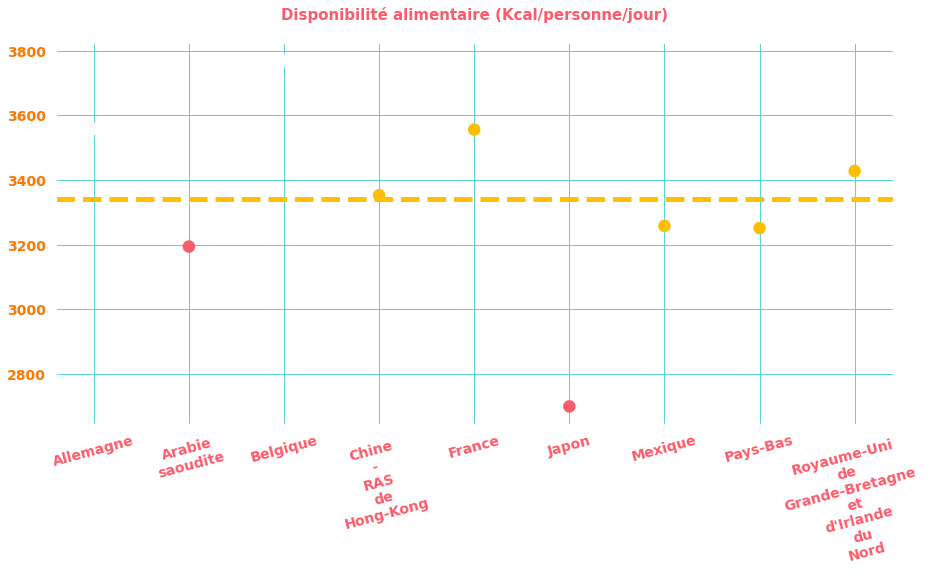

------------------------------------------------------------------------------------------------------------


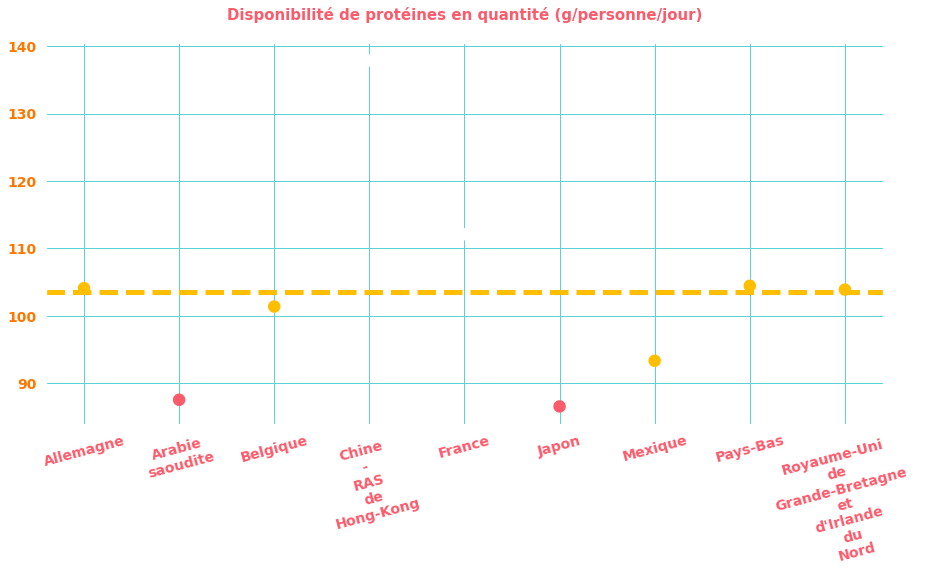

------------------------------------------------------------------------------------------------------------


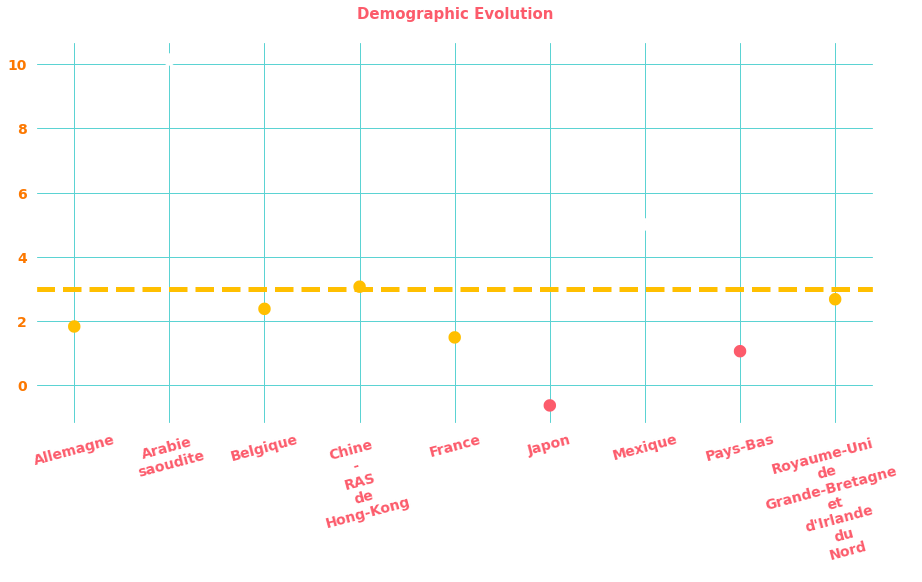

------------------------------------------------------------------------------------------------------------


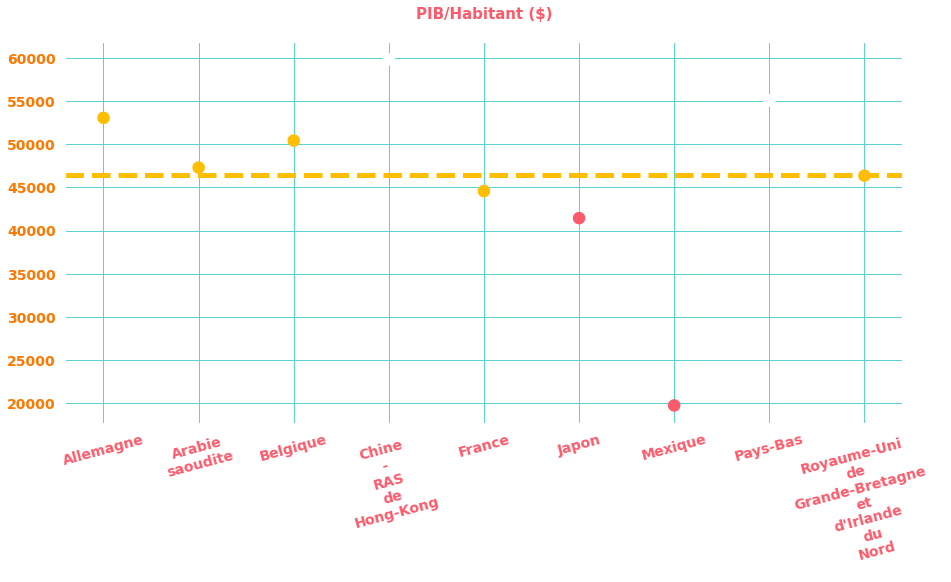

------------------------------------------------------------------------------------------------------------


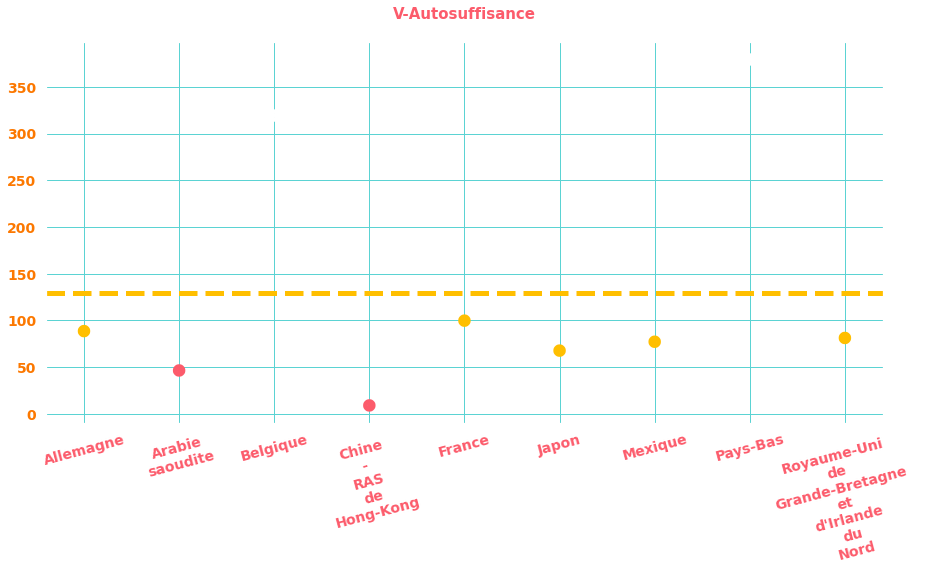

------------------------------------------------------------------------------------------------------------


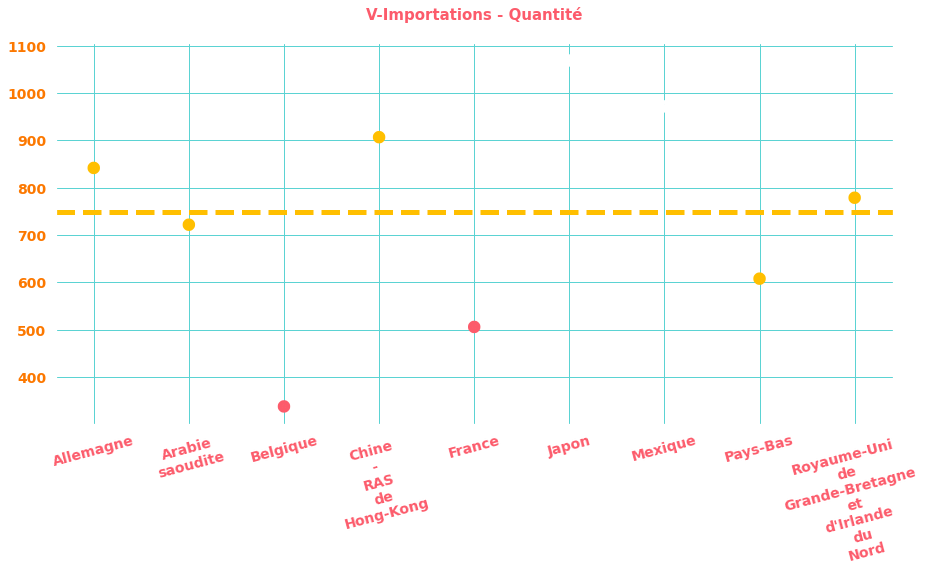

In [70]:
count = 10

for column in dfgraf.columns[:-3]:
    if column == 'x':
        continue
    colors = ['#ffbf00'] * len(dfgraf)
    min_indexes = dfgraf[column].nsmallest(2).index
    max_indexes = dfgraf[column].nlargest(2).index
    for min_index in min_indexes:
        min_location = dfgraf.index.get_loc(min_index)
        colors[min_location] = '#fc5b6b'
    for max_index in max_indexes:
        max_location = dfgraf.index.get_loc(max_index)
        colors[max_location] = 'white'
    
    ax = dfgraf.plot(kind='scatter', x='x', y=column, figsize=(15, 7), c=colors,linewidths=8.0)
    ax.set_xticklabels(dfgraf.index, rotation=15)
    ax.grid(True)
#     plt.xlabel('Zone')
    plt.xticks(size="14",fontweight='bold')
    plt.yticks(size="14",fontweight='bold')
    print("------------------------------------------------------------------------------------------------------------")
    plt.ylabel('')
    plt.xlabel('')
    mean = dfgraf[column].mean()
    plt.axhline(y=mean, color='#ffbf00', linestyle='--',linewidth=5)
    plt.savefig(str(count) + ".png", transparent=True,bbox_inches='tight')
    plt.title(column + "\n",fontweight='bold',fontsize=15)
    plt.show()
    count += 1